In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
import os

sys.path.append(os.path.abspath('..'))

from NeuralNetwork import NeuralNetwork

In [3]:
data = pd.read_csv("./data/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

# Each COLUMN of the data is a SAMPLE
data_test = data[0:1000]
Y_test = data_test[:, 0]
X_test = data_test[:, 1:n]

data_train = data[1000:m]
Y_train = data_train[:, 0]
X_train = data_train[:, 1:n]

In [5]:
# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding
def one_hot_encode(y, num_classes=10):
    return np.eye(num_classes)[y.astype(int)]

y_train_oh = one_hot_encode(Y_train)
y_test_oh = one_hot_encode(Y_test)

# Create and train the neural network
nn = NeuralNetwork(input_size=784, hidden_size=10, output_size=10, learning_rate=0.1)
nn.train(X_train, y_train_oh, batch_size=32, epochs=100)

Epoch 0 - Loss: 0.089913
Epoch 1 - Loss: 0.089273
Epoch 2 - Loss: 0.079548
Epoch 3 - Loss: 0.056903
Epoch 4 - Loss: 0.036565
Epoch 5 - Loss: 0.026325
Epoch 6 - Loss: 0.021693
Epoch 7 - Loss: 0.019014
Epoch 8 - Loss: 0.017455
Epoch 9 - Loss: 0.016398
Epoch 10 - Loss: 0.015576
Epoch 11 - Loss: 0.014967
Epoch 12 - Loss: 0.014542
Epoch 13 - Loss: 0.014128
Epoch 14 - Loss: 0.013853
Epoch 15 - Loss: 0.013534
Epoch 16 - Loss: 0.013219
Epoch 17 - Loss: 0.013043
Epoch 18 - Loss: 0.012798
Epoch 19 - Loss: 0.012594
Epoch 20 - Loss: 0.012466
Epoch 21 - Loss: 0.012269
Epoch 22 - Loss: 0.012204
Epoch 23 - Loss: 0.012123
Epoch 24 - Loss: 0.011804
Epoch 25 - Loss: 0.011741
Epoch 26 - Loss: 0.011582
Epoch 27 - Loss: 0.011473
Epoch 28 - Loss: 0.011356
Epoch 29 - Loss: 0.011267
Epoch 30 - Loss: 0.011158
Epoch 31 - Loss: 0.011046
Epoch 32 - Loss: 0.011017
Epoch 33 - Loss: 0.010895
Epoch 34 - Loss: 0.010811
Epoch 35 - Loss: 0.010744
Epoch 36 - Loss: 0.010625
Epoch 37 - Loss: 0.010568
Epoch 38 - Loss: 0.010

In [6]:
# Evaluate
y_pred = nn.forward(X_test)
pred_labels = np.argmax(y_pred, axis = 1)
accuracy = np.mean(pred_labels == Y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 93.90%


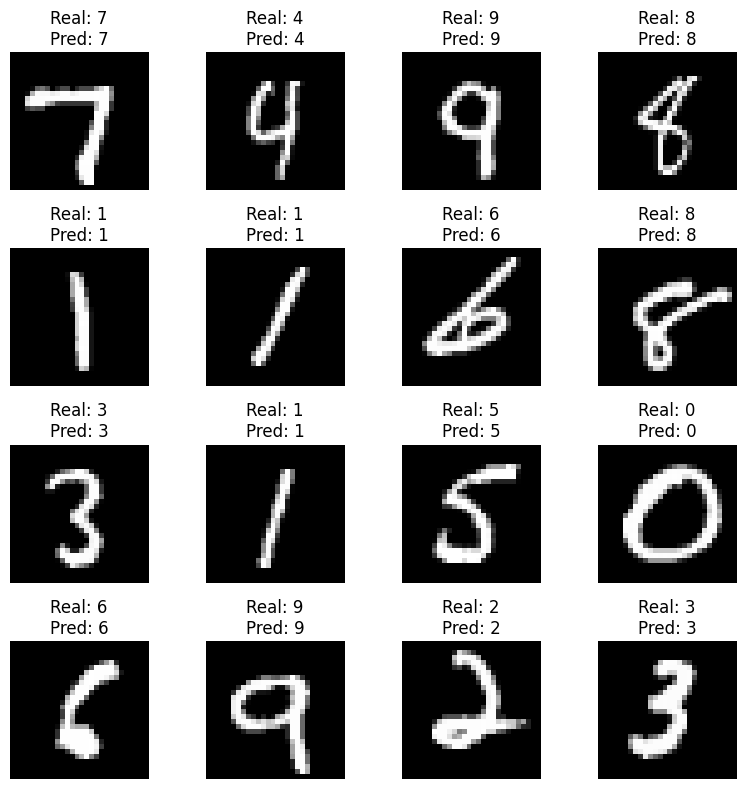

In [8]:
pred_labels = np.argmax(y_pred, axis = 1)

# Plot the predictions
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
axes = axes.ravel()

for i in range(16):
    img = X_test[i].reshape(28, 28)
    real_label = int(Y_test[i])
    pred_label = int(pred_labels[i])

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Real: {real_label}\nPred: {pred_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()